# Analysing and Visualising Retrieval Results

So you have finally completed your retrievals. Many congratulations to your 🔥CPUs🔥 on their well-deserved rest. Now comes the fun part: casting your results into publication-quality plots!

Here we continue our adventure into the atmosphere of WASP-999b (please see [\"Atmospheric Retrievals with POSEIDON\"](retrieval_basic.html) if you have yet to start your journey).

Onwards to some plotting!

## Post-Retrieval Analysis Setup

When analysing output from a completed retrieval you don't need to import most of the regular POSEIDON functions we have seen in previous tutorials. But we still need a few common properties, so let's start by loading the star and planet objects for the WASP-999 system.

In [1]:
from POSEIDON.core import create_star, create_planet
from POSEIDON.constants import R_Sun, R_J

#***** Define stellar properties *****#

R_s = 1.155*R_Sun     # Stellar radius (m)
T_s = 6071.0          # Stellar effective temperature (K)
Met_s = 0.0           # Stellar metallicity [log10(Fe/H_star / Fe/H_solar)]
log_g_s = 4.38        # Stellar log surface gravity (log10(cm/s^2) by convention)

# Create the stellar object
star = create_star(R_s, T_s, log_g_s, Met_s)

#***** Define planet properties *****#

planet_name = 'WASP-999b'  # Planet name used for plots, output files etc.

R_p = 1.359*R_J     # Planetary radius (m)
g_p = 9.186         # Gravitational field of planet (m/s^2)
T_eq = 1400.0       # Equilibrium temperature (K)

# Create the planet object
planet = create_planet(planet_name, R_p, gravity = g_p, T_eq = T_eq)

In order to pull the retrieval results to plot, we need to redefine the models used to run the retrievals in the [\"Atmospheric Retrievals with POSEIDON\"](retrieval_basic.html) tutorial. Here we will access the retrieval model with only $\rm{H}_2 \rm{O}$ and the model with $\rm{H}_2 \rm{O}$, $\rm{Na}$, $\rm{K}$, and $\rm{TiO}$.

The output files in the Wasp-999b/retrievals folder are accessed via the `model_name` variable for each retrieval model. 

In [2]:
from POSEIDON.core import define_model

#***** Define models from completed retrievals *****#

model_name_1 = 'My_first_retrieval'  # First model name
model_name_2 = 'Improved_retrieval'  # Second model name

bulk_species = ['H2', 'He']     # H2 + He comprises the bulk atmosphere

param_species_1 = ['H2O']                         # First model
param_species_2 = ['Na', 'K', 'TiO', 'H2O']       # Second model

# Create the model objects
model_1 = define_model(model_name_1, bulk_species, param_species_1)
model_2 = define_model(model_name_2, bulk_species, param_species_2)

# Check the free parameters
print("Free parameters for model 1: " + str(model_1['param_names']))
print("Free parameters for model 2: " + str(model_2['param_names']))

Free parameters for model 1: ['R_p_ref' 'T' 'log_H2O']
Free parameters for model 2: ['R_p_ref' 'T' 'log_Na' 'log_K' 'log_TiO' 'log_H2O']


### Access Retrieved Spectra

We can now load the retrieved spectra and confidence intervals using the `read_retrieved_spectrum` function for each model and stack them in the same collection. 

In [3]:
from POSEIDON.utility import read_retrieved_spectrum, plot_collection

# Read retrieved spectrum confidence regions for model 1
wl, spec_low2, spec_low1, spec_median, \
spec_high1, spec_high2 = read_retrieved_spectrum(planet_name, model_name_1)

# Create composite spectra objects for plotting
spectra_median = plot_collection(spec_median, wl, collection = [])
spectra_low1 = plot_collection(spec_low1, wl, collection = []) 
spectra_low2 = plot_collection(spec_low2, wl, collection = []) 
spectra_high1 = plot_collection(spec_high1, wl, collection = []) 
spectra_high2 = plot_collection(spec_high2, wl, collection = [])

# Read retrieved spectrum confidence regions for model 2
wl, spec_low2, spec_low1, spec_median, \
spec_high1, spec_high2 = read_retrieved_spectrum(planet_name, model_name_2)

# Add to composite spectra objects for plotting
spectra_median = plot_collection(spec_median, wl, collection = spectra_median)
spectra_low1 = plot_collection(spec_low1, wl, collection = spectra_low1) 
spectra_low2 = plot_collection(spec_low2, wl, collection = spectra_low2) 
spectra_high1 = plot_collection(spec_high1, wl, collection = spectra_high1) 
spectra_high2 = plot_collection(spec_high2, wl, collection = spectra_high2)

### Load Data

Next, let's load in the observed transmission spectrum of WASP-999b. Note that we don't need to provide the wavelength grid, since `wl` was read from the retrieved spectra.

In [4]:
from POSEIDON.core import load_data

# Specify the STIS and WFC3 Hubble data
data_dir = '../../../POSEIDON/reference_data/observations/WASP-999b'             
datasets = ['WASP-999b_STIS_G430.dat', 
            'WASP-999b_STIS_G750.dat', 
            'WASP-999b_WFC3_G141.dat']  
instruments = ['STIS_G430', 'STIS_G750', 'WFC3_G141']

# Load dataset, pre-load instrument PSF and transmission function
data = load_data(data_dir, datasets, instruments, wl)

## Publication Quality Plots with POSEIDON

Have you ever been running retrievals and thought to yourself, *how do people get their retrieved results to look so stunning in their papers*? Well you've come to the right place!

One common technique for succinct visual presentation of retrieval results is to combine retrieved spectra and specific posterior histograms in a single composite image. Here's a recent example of one such Figure (produced using POSEIDON) from [Fournier-Tondreau et al. 2024](https://ui.adsabs.harvard.edu/abs/2024MNRAS.528.3354F/abstract):

<img src="../../_static/notebook_images/HAT-P-18b_Example_Retrieval_Figure.png" alt="HAT-P-18b Pretty Retrieval Plot">

We know what you're thinking: *oh no, what horrors of matplotlib gridspec must be conjured to make a plot such as this?* 

Fear not, for you shall now learn one of our closest kept secrets.

Let the magic begin 🧙‍♂️🪄

### The Magic of `subplot_mosaic`

The most versatile and user-friendly function for producing complex plots in matplotlib is `subplot_mosiac`. In this function, you define a figure layout graphically with a set of symbols.

Let's sketch a figure layout with a retrieved spectrum on top and five histograms underneath. We'll use the symbol 'A' for the spectrum and lower case letters 'a' through 'e' for the 5 histograms (you can use any symbols you like).

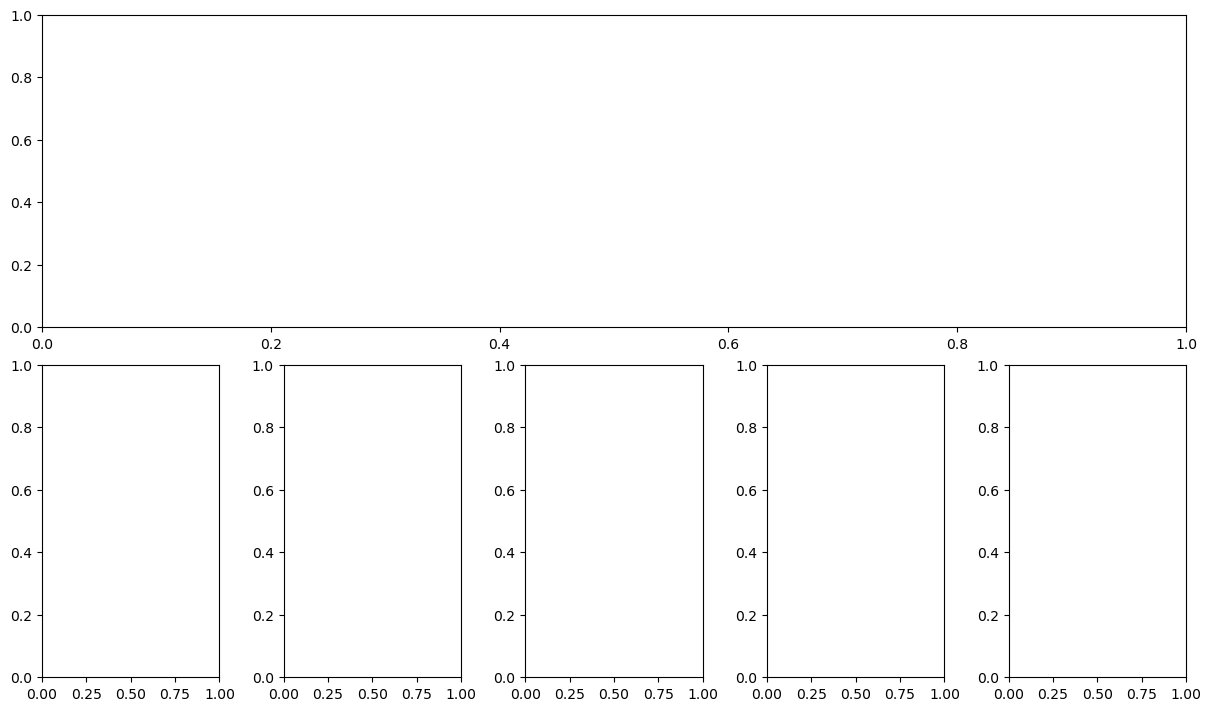

In [5]:
#***** Plotting magic *****#

import matplotlib.pyplot as plt

fig_combined = plt.figure(constrained_layout=True, figsize=(12, 7))  

# This function is the magic. 
# Each letter corresponds to one matplotlib axis, which you can then pass to POSEIDON's plotting functions
axd = fig_combined.subplot_mosaic(
    """
    AAAAA
    abcde
    """
)

The histograms would look a little too tall in this layout, so let's stretch the retrieved spectrum to use more of the space.

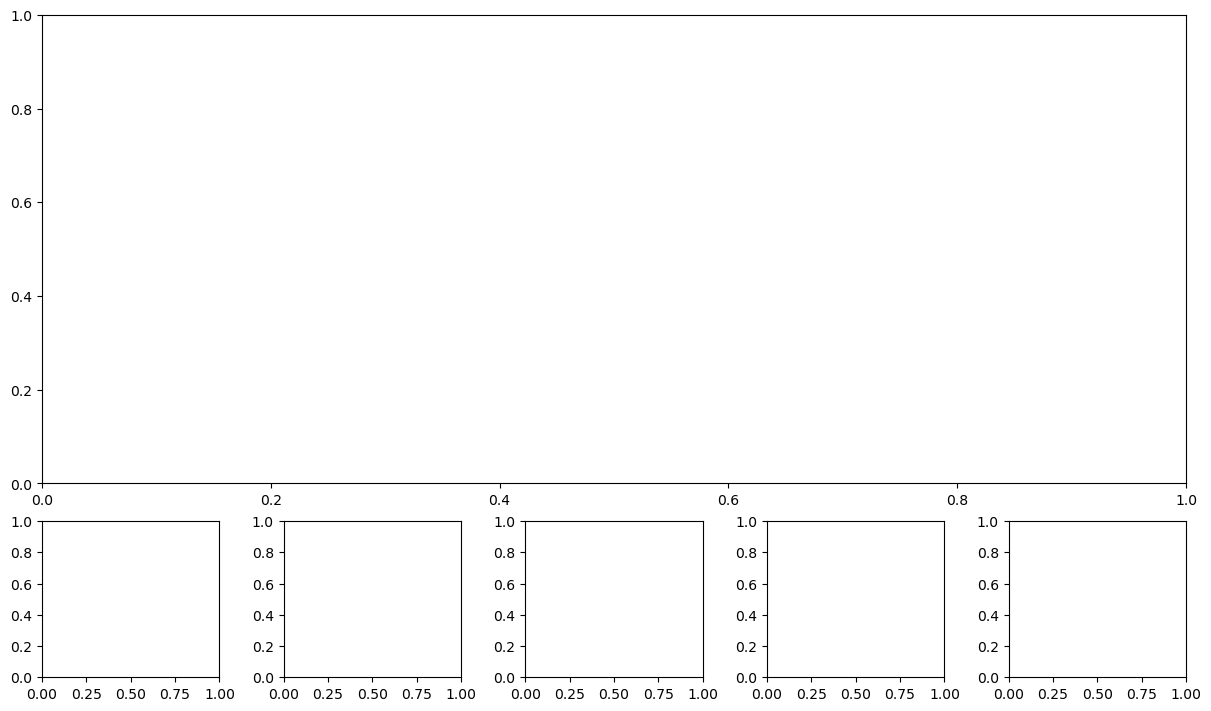

In [6]:
fig_combined = plt.figure(constrained_layout=True, figsize=(12, 7))  

# We'll add two more rows of 'A' to alter the aspect ratio
axd = fig_combined.subplot_mosaic(
    """
    AAAAA
    AAAAA
    AAAAA
    abcde
    """
)

Great, that's a nice aspect ratio!

### Plot Retrieved Spectra

To plot the retrieved spectra in panel 'A', we can now assign this panel to an axis object `ax_spectrum` and pass this axis object into POSEIDON's exist `plot_spectra_retrieved` function. 

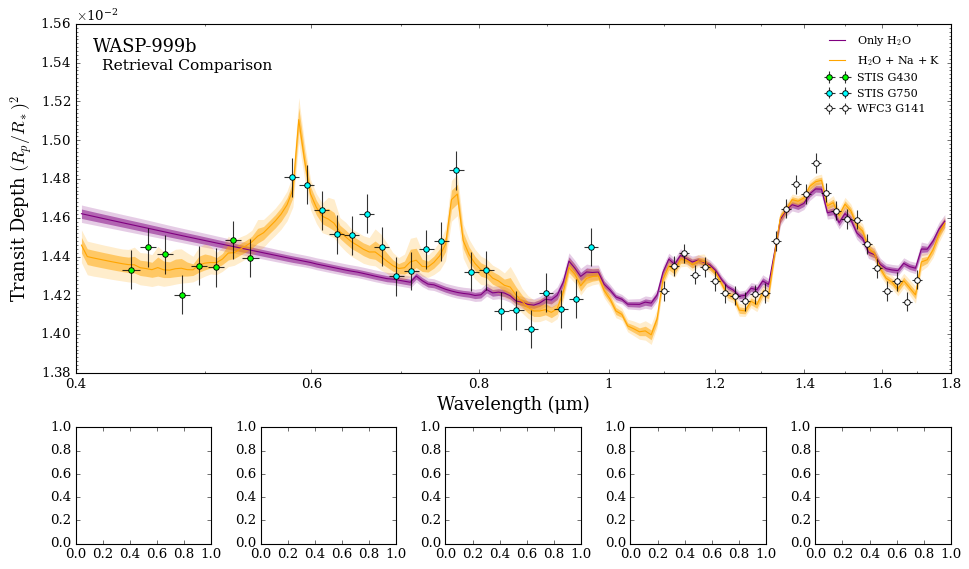

<Figure size 853.36x480 with 0 Axes>

In [7]:
from POSEIDON.visuals import plot_spectra_retrieved

# Create composite figure
fig_combined = plt.figure(constrained_layout=True, figsize=(12, 7))  

# Create layout
axd = fig_combined.subplot_mosaic(
    """
    AAAAA
    AAAAA
    AAAAA
    abcde
    """
)

# Plot the spectra in ax A
ax_spectrum = axd["A"]

# Define the model 1 and 2 colors for the plot 
model_1_color = 'purple'
model_2_color = 'orange'

# Produce figure
_ = plot_spectra_retrieved(spectra_median, spectra_low2, spectra_low1, 
                           spectra_high1, spectra_high2, planet_name,
                           data, R_to_bin = 100, show_ymodel = False,
                           colour_list = [model_1_color, model_2_color], 
                           plt_label = 'Retrieval Comparison',
                           spectra_labels = ['Only H$_2$O', 'H$_2$O + Na + K'],
                           data_labels = ['STIS G430', 'STIS G750', 'WFC3 G141'],
                           data_colour_list = ['lime', 'cyan', 'white'],
                           data_marker_list = ['o', 'o', 'o'],
                           data_marker_size_list = [5, 5, 5],
                           show_data_cap = False,
                           figure_shape = 'wide', save_fig = False,
                           y_min = 1.38e-2, y_max = 1.56e-2,
                           legend_location = 'upper right',
                           ax = ax_spectrum,   # <---------- Feed spectrum axis here
                          )

### Plot Retrieved Histograms

Now let's try plotting the retrieved histograms for the isothermal temperature ($T$) and the water volume mixing ratio ($\log \rm{H_2 O}$). These parameters were present in both model 1 and 2, so we can overplot them on the first two panels.

We first define the symbols we want the first two histograms to be plotted on (here, 'a' and 'b') and pass the axes to POSEIDON's `plot_histograms` function. 

The `plot_histograms` function requires the model objects of the retrievals you want to plot, the names of the parameters you want to plot, the x-axis 'span' for each histogram, the number of bins, and the retrieval colour list (usually corresponding to the spectra colours). 

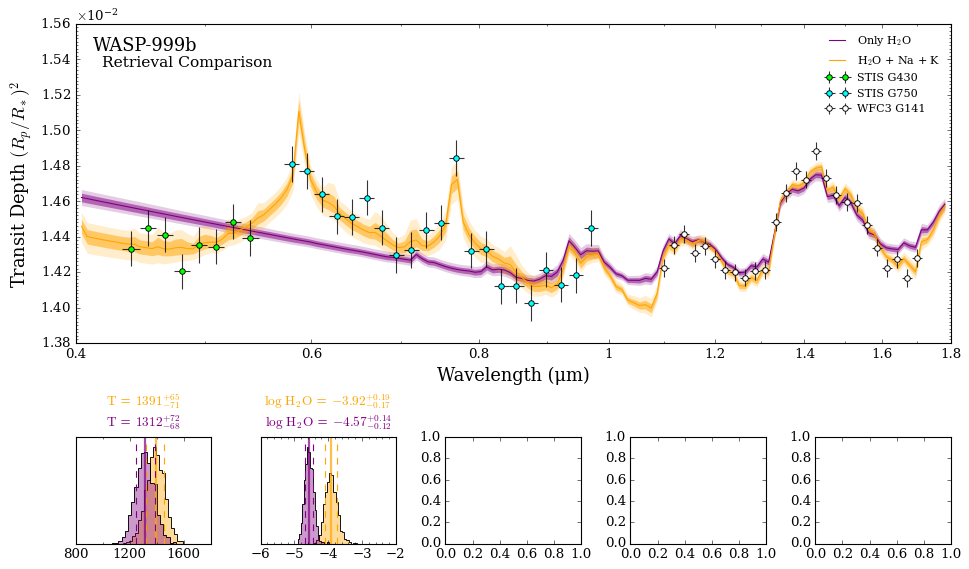

<Figure size 853.36x480 with 0 Axes>

<Figure size 600x200 with 0 Axes>

In [8]:
from POSEIDON.visuals import plot_histograms

# Create composite figure
fig_combined = plt.figure(constrained_layout=True, figsize=(12, 7))  

# Create layout
axd = fig_combined.subplot_mosaic(
    """
    AAAAA
    AAAAA
    AAAAA
    abcde
    """
)

# Plot the spectra in ax A
ax_spectrum = axd["A"]

# Define the model 1 and 2 colors for the plot 
model_1_color = 'purple'
model_2_color = 'orange'

# Produce figure
_ = plot_spectra_retrieved(spectra_median, spectra_low2, spectra_low1, 
                           spectra_high1, spectra_high2, planet_name,
                           data, R_to_bin = 100, show_ymodel = False,
                           colour_list = [model_1_color, model_2_color], 
                           plt_label = 'Retrieval Comparison',
                           spectra_labels = ['Only H$_2$O', 'H$_2$O + Na + K'],
                           data_labels = ['STIS G430', 'STIS G750', 'WFC3 G141'],
                           data_colour_list = ['lime', 'cyan', 'white'],
                           data_marker_list = ['o', 'o', 'o'],
                           data_marker_size_list = [5, 5, 5],
                           show_data_cap = False,
                           figure_shape = 'wide', save_fig = False,
                           y_min = 1.38e-2, y_max = 1.56e-2,
                           legend_location = 'upper right',
                           ax = ax_spectrum,   # <---------- Feed spectrum axis here
                          )

# Grab two axes for the first two panels
axes_histograms_1 = [axd['a'], axd['b']]      # The first two panels have shared parameters

# Store the models as a list (the first model will be used for the numbers in the title)
models = [model_2, model_1]

_ = plot_histograms(planet, models, plot_parameters = ['T', 'log_H2O'], 
                    span = ((800, 1800), (-6, -2)),
                    N_bins = [20, 20],
                    retrieval_colour_list = [model_2_color, model_1_color],
                    save_fig = False,
                    axes = axes_histograms_1, # <------ Feed first histogram axis here
                    )

Now we're getting somewhere! 

Let's complete the plot by adding the three parameters that only show up in model 2, namely the mixing ratio of $\rm{Na}$, $\rm{K}$, and $\rm{TiO}$.

The set up and functional form of `plot_histograms` is the same as above, except for a single retrieval model we need to use `parameter_colour_list` to individually define the colours of each parameter being plotted (otherwise by default a different colour will be used for each panel).

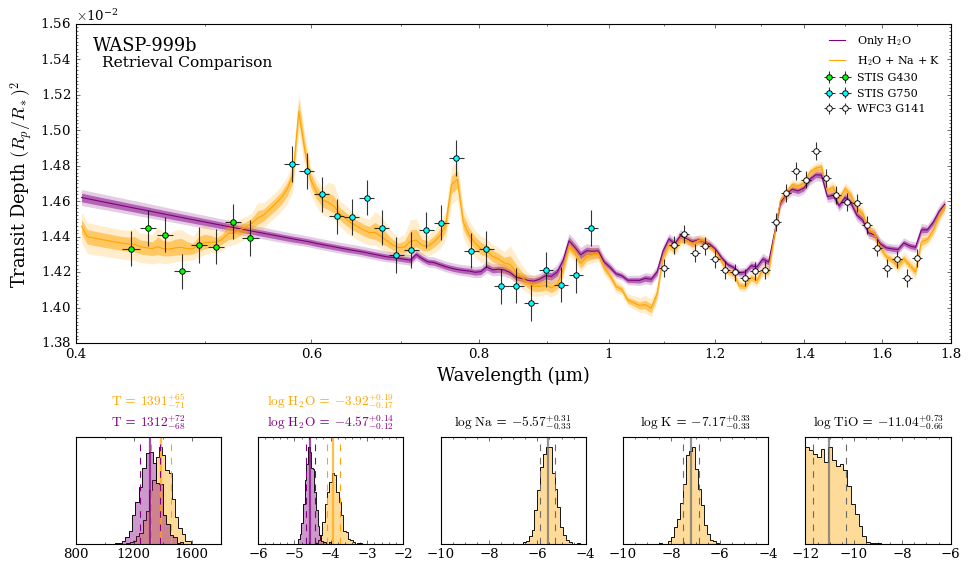

<Figure size 853.36x480 with 0 Axes>

<Figure size 600x200 with 0 Axes>

<Figure size 600x200 with 0 Axes>

In [9]:
# Create composite figure
fig_combined = plt.figure(constrained_layout=True, figsize=(12, 7))  

# Create layout
axd = fig_combined.subplot_mosaic(
    """
    AAAAA
    AAAAA
    AAAAA
    abcde
    """
)

# Plot the spectra in ax A
ax_spectrum = axd["A"]

# Define the model 1 and 2 colors for the plot 
model_1_color = 'purple'
model_2_color = 'orange'

# Produce figure
_ = plot_spectra_retrieved(spectra_median, spectra_low2, spectra_low1, 
                           spectra_high1, spectra_high2, planet_name,
                           data, R_to_bin = 100, show_ymodel = False,
                           colour_list = [model_1_color, model_2_color], 
                           plt_label = 'Retrieval Comparison',
                           spectra_labels = ['Only H$_2$O', 'H$_2$O + Na + K'],
                           data_labels = ['STIS G430', 'STIS G750', 'WFC3 G141'],
                           data_colour_list = ['lime', 'cyan', 'white'],
                           data_marker_list = ['o', 'o', 'o'],
                           data_marker_size_list = [5, 5, 5],
                           show_data_cap = False,
                           figure_shape = 'wide', save_fig = False,
                           y_min = 1.38e-2, y_max = 1.56e-2,
                           legend_location = 'upper right',
                           ax = ax_spectrum,   # <---------- Feed spectrum axis here
                          )

# Grab two axes for the first two panels
axes_histograms_1 = [axd['a'], axd['b']]      # The first two panels have shared parameters

# Store the models as a list (the first model will be used for the numbers in the title)
models = [model_2, model_1]

_ = plot_histograms(planet, models, plot_parameters = ['T', 'log_H2O'], 
                    span = ((800, 1800), (-6, -2)),
                    N_bins = [20, 20],
                    retrieval_colour_list = [model_2_color, model_1_color],
                    save_fig = False,
                    axes = axes_histograms_1, # <------ Feed first histogram axis here
                    )

# Grab three axes for the next three panels
axes_histograms_2 = [axd['c'], axd['d'], axd['e']]

# We just need model 2 now (since model 1 didn't include Na, K, or TiO)
models = [model_2]

_ = plot_histograms(planet, models, plot_parameters = ['log_Na', 'log_K', 'log_TiO'], 
                    span = ((-10, -4), (-10, -4), (-12, -6)),
                    N_bins = [20, 20, 20],
                    parameter_colour_list = [model_2_color, model_2_color, model_2_color],
                    save_fig = False,
                    axes = axes_histograms_2,   # <------ Feed second histogram axis here
                    )


Voila!

Now we can save the composite Figure to include in a paper.

In [10]:
# Save as a PDF
fig_combined.savefig('./POSEIDON_output/WASP-999b/plots/My_Ultimate_Figure.pdf', bbox_inches='tight')

# Save as a png (e.g. for a talk)
fig_combined.savefig('./POSEIDON_output/WASP-999b/plots/My_Ultimate_Figure.png', bbox_inches='tight', dpi=300)

### Advanced Plotting

Now let's explore some other ways we can use your newfound powers.

Say you want a sub-panel for the spectra that just shows the STIS data without the 1σ and 2σ confidence intervals (i.e. the median model only). We'll also experiment with customising the histogram settings.

Let's create the composite object and see how it looks:

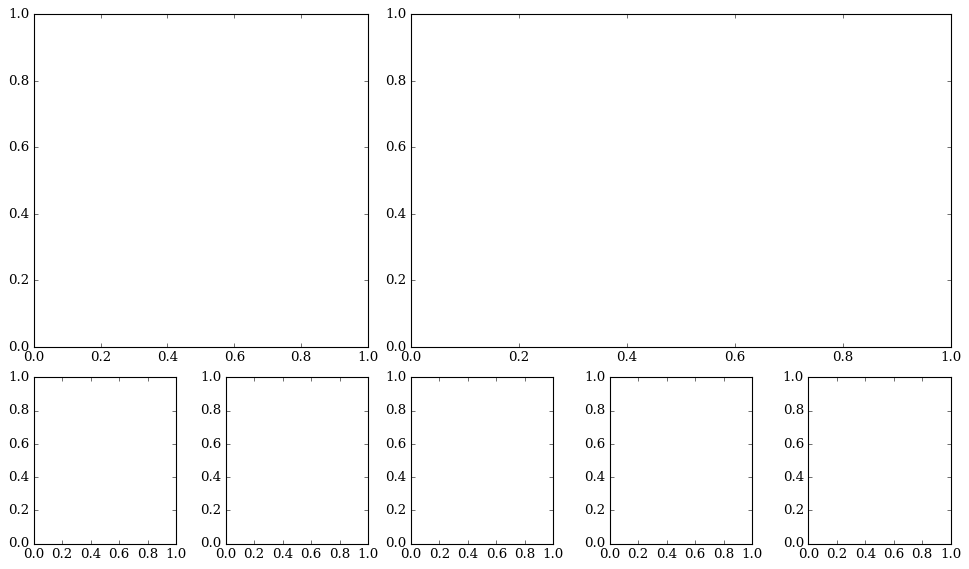

In [11]:
import matplotlib.pyplot as plt

fig_combined = plt.figure(constrained_layout=True, figsize=(12, 7))  

# Deploy the magic function
axd = fig_combined.subplot_mosaic(
    """
    BBAAA
    BBAAA
    abcde
    """
)

That looks good! We will plan on putting the STIS data zoom-in in the 'B' axis, the full data set in 'A', and the histograms on the bottom row. We have also changed the 'A' and 'B' region of the plot to be two rows instead of three, which will make the histogram plots slightly larger. 

Let's work on the STIS zoom-in first. We'll create a new data object that just contains the STIS datasets so that the legend in panel 'B' won't have the WFC3 data.

In [12]:
# Create a zoom in on STIS

# Specify the STIS data
datasets = ['WASP-999b_STIS_G430.dat',
            'WASP-999b_STIS_G750.dat']  
instruments = ['STIS_G430', 'STIS_G750']

# Load dataset, pre-load instrument PSF and transmission function
data_stis = load_data(data_dir, datasets, instruments, wl)

Ok let's see how the STIS zoom in looks. In this plot we have added additional optional arguments to customize the plot: the data marker size has been made bigger (3 to 5), the sigma to plot = 0 (no shaded region in the plot), and the legend was made two column. 

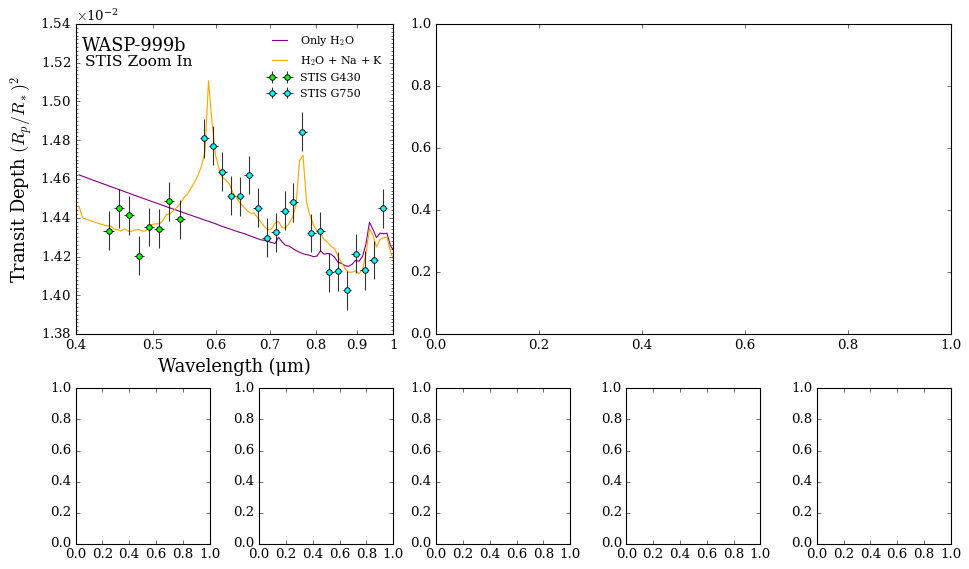

<Figure size 853.36x480 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt
from POSEIDON.visuals import plot_spectra_retrieved

fig_combined = plt.figure(constrained_layout=True, figsize=(12, 7))  

# Create layout
axd = fig_combined.subplot_mosaic(
    """
    BBAAA
    BBAAA
    abcde
    """
)

# Define the model 1 and 2 colors for the plot 
model_1_color = 'purple'
model_2_color = 'orange'

# Plot the spectra in ax B
ax_spectrum_1 = axd["B"]

_ = plot_spectra_retrieved(spectra_median, spectra_low2, spectra_low1, 
                           spectra_high1, spectra_high2, planet_name,
                           data_stis, R_to_bin = 100, show_ymodel = False,
                           colour_list = [model_1_color, model_2_color], 
                           plt_label = 'STIS Zoom In',
                           spectra_labels = ['Only H$_2$O', 'H$_2$O + Na + K'],
                           data_labels = ['STIS G430', 'STIS G750'],
                           data_colour_list = ['lime', 'cyan'],
                           data_marker_list = ['o', 'o'], 
                           data_marker_size_list = [5, 5],
                           show_data_cap = False,
                           figure_shape = 'wide', save_fig = False,
                           y_min = 1.38e-2, y_max = 1.54e-2,
                           legend_location = 'upper right',
                           sigma_to_plot = 0,           # Remove 1 and 2 sigma contours
                           wl_min = 0.4, wl_max = 1.0,  # Restrict wavelength range
                           ax = ax_spectrum_1,  # <---------- Feed spectrum axis here
                           )

Let's tackle the histograms next. 

We want to make the labels more readable, so we can alter the `tick_labelsize` and the `title_labelsize` to increase the font sizes. We'll also rename the histogram titles from the parameter names to customised labels (let's use '$T_{\rm{iso}}$' to indicate the temperature  is isothermal and remove the log in front of the chemical species parameter names).

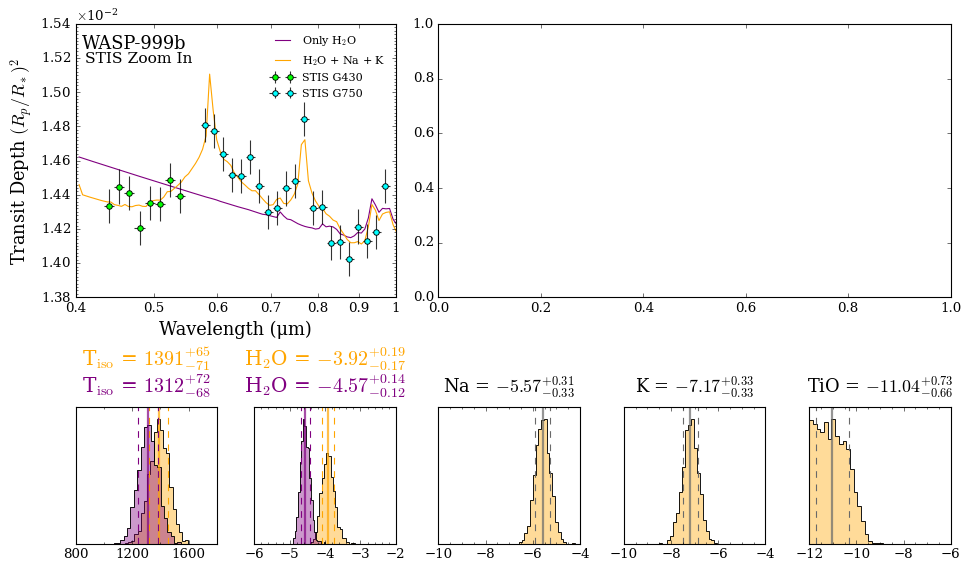

<Figure size 853.36x480 with 0 Axes>

<Figure size 600x200 with 0 Axes>

<Figure size 600x200 with 0 Axes>

In [14]:
from POSEIDON.visuals import plot_histograms

fig_combined = plt.figure(constrained_layout=True, figsize=(12, 7))  

# Create layout
axd = fig_combined.subplot_mosaic(
    """
    BBAAA
    BBAAA
    abcde
    """
)

# Define the model 1 and 2 colors for the plot 
model_1_color = 'purple'
model_2_color = 'orange'

# Plot the spectra in ax B
ax_spectrum_1 = axd["B"]

# Plot the first spectrum panel
_ = plot_spectra_retrieved(spectra_median, spectra_low2, spectra_low1, 
                           spectra_high1, spectra_high2, planet_name,
                           data_stis, R_to_bin = 100, show_ymodel = False,
                           colour_list = [model_1_color, model_2_color], 
                           plt_label = 'STIS Zoom In',
                           spectra_labels = ['Only H$_2$O', 'H$_2$O + Na + K'],
                           data_labels = ['STIS G430', 'STIS G750'],
                           data_colour_list = ['lime', 'cyan'],
                           data_marker_list = ['o', 'o'], 
                           data_marker_size_list = [5, 5],
                           show_data_cap = False,
                           figure_shape = 'wide', save_fig = False,
                           y_min = 1.38e-2, y_max = 1.54e-2,
                           legend_location = 'upper right',
                           sigma_to_plot = 0,           # Remove 1 and 2 sigma contours
                           wl_min = 0.4, wl_max = 1.0,  # Restrict wavelength range
                           ax = ax_spectrum_1,  # <---------- Feed spectrum axis here
                           )

# Grab histogram axes
axes_histograms_1 = [axd['a'], axd['b']]
axes_histograms_2 = [axd['c'], axd['d'], axd['e']]

# Plot first two panels
_ = plot_histograms(planet, models = [model_2, model_1], 
                    plot_parameters = ['T', 'log_H2O'], 
                    span = ((800, 1800), (-6, -2)),
                    N_bins = [20, 20],
                    retrieval_colour_list = [model_2_color, model_1_color],
                    save_fig = False,
                    axes = axes_histograms_1, # <------ Feed first histogram axis here
                    tick_labelsize = 12,      # x axis tick labels
                    title_fontsize = 18,      # Title size
                    custom_labels = ['T$_{\mathrm{iso}}$', 'H$_2$O'],   # Custom titles
                    )

# Plot next three panels
_ = plot_histograms(planet, models = [model_2], 
                    plot_parameters = ['log_Na', 'log_K', 'log_TiO'], 
                    span = ((-10, -4), (-10, -4), (-12, -6)),
                    N_bins = [20, 20, 20],
                    parameter_colour_list = [model_2_color, model_2_color, model_2_color],
                    save_fig = False,
                    axes = axes_histograms_2,   # <------ Feed second histogram axis here
                    tick_labelsize = 12,        # x axis tick labels
                    title_fontsize = 16,        # Title size
                    custom_labels = ['Na', 'K', 'TiO'],    # Custom titles
                    )

Not bad!

We can also explicitly set the major and minor tick spacing of each histogram. For example, let's have major tick labels with 200K spacing and minor ticks for every 100K on the x-axis span (1000K to 1600K) in the isothermal temperature histogram. 

Let's also make the colours more vibrant by explicitly setting the alpha values. For the histograms with more than one retrieval, we'll use alpha = 0.6 to make the colours more vibrant (but retaining with some transparency). For the histograms with just one retrieval, we'll use alpha = 1 (opaque).

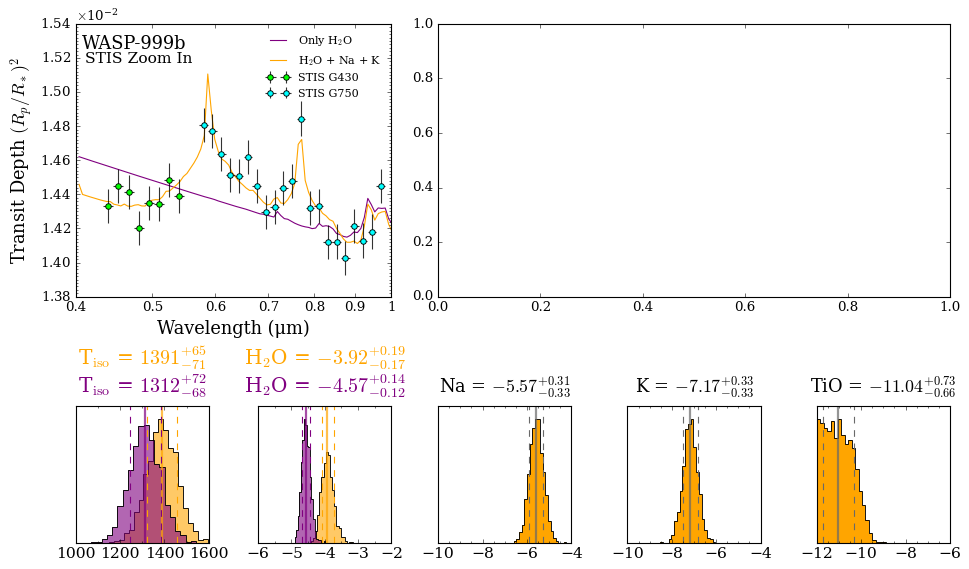

<Figure size 853.36x480 with 0 Axes>

<Figure size 600x200 with 0 Axes>

<Figure size 600x200 with 0 Axes>

In [15]:
fig_combined = plt.figure(constrained_layout=True, figsize=(12, 7))  

# Create layout
axd = fig_combined.subplot_mosaic(
    """
    BBAAA
    BBAAA
    abcde
    """
)

# Define the model 1 and 2 colors for the plot 
model_1_color = 'purple'
model_2_color = 'orange'

# Plot the spectra in ax B
ax_spectrum_1 = axd["B"]

# Plot the first spectrum panel
_ = plot_spectra_retrieved(spectra_median, spectra_low2, spectra_low1, 
                           spectra_high1, spectra_high2, planet_name,
                           data_stis, R_to_bin = 100, show_ymodel = False,
                           colour_list = [model_1_color, model_2_color], 
                           plt_label = 'STIS Zoom In',
                           spectra_labels = ['Only H$_2$O', 'H$_2$O + Na + K'],
                           data_labels = ['STIS G430', 'STIS G750'],
                           data_colour_list = ['lime', 'cyan'],
                           data_marker_list = ['o', 'o'], 
                           data_marker_size_list = [5, 5],
                           show_data_cap = False,
                           figure_shape = 'wide', save_fig = False,
                           y_min = 1.38e-2, y_max = 1.54e-2,
                           legend_location = 'upper right',
                           sigma_to_plot = 0,           # Remove 1 and 2 sigma contours
                           wl_min = 0.4, wl_max = 1.0,  # Restrict wavelength range
                           ax = ax_spectrum_1,  # <---------- Feed spectrum axis here
                           )

# Grab histogram axes
axes_histograms_1 = [axd['a'], axd['b']]
axes_histograms_2 = [axd['c'], axd['d'], axd['e']]

# Plot first two panels
_ = plot_histograms(planet, models = [model_2, model_1], 
                    plot_parameters = ['T', 'log_H2O'], 
                    span = ((1000, 1600), (-6, -2)),
                    N_bins = [20, 20],
                    retrieval_colour_list = [model_2_color, model_1_color],
                    save_fig = False,
                    axes = axes_histograms_1, # <------ Feed first histogram axis here
                    tick_labelsize = 14,                                # x axis tick labels
                    title_fontsize = 18,                                # Title size
                    custom_labels = ['T$_{\mathrm{iso}}$', 'H$_2$O'],   # Custom titles
                    custom_ticks = [[200,100], [1,0.5]],                # Custom [major,minor] spacing
                    alpha_hist = 0.6,                                   # Histogram alpha
                    ) 

# Plot next three panels
_ = plot_histograms(planet, models = [model_2], 
                    plot_parameters = ['log_Na', 'log_K', 'log_TiO'], 
                    span = ((-10, -4), (-10, -4), (-12, -6)),
                    N_bins = [20, 20, 20],
                    parameter_colour_list = [model_2_color, model_2_color, model_2_color],
                    save_fig = False,
                    axes = axes_histograms_2,   # <------ Feed second histogram axis here
                    tick_labelsize = 14,                          # x axis tick labels
                    title_fontsize = 16,                          # Title size
                    custom_labels = ['Na', 'K', 'TiO'],           # Custom titles
                    custom_ticks = [[2,0.5], [2,0.5], [2,0.5],],  # Custom [major,minor] spacing
                    alpha_hist = 1.0                              # Histogram alpha
                    )

Now let's complete the Figure by adding the spectra plot to panel 'A' from the previous part of the tutorial.

Since we already have a spectrum on the left hand panel, we'll turn off the `y_labels` on the right hand panel.

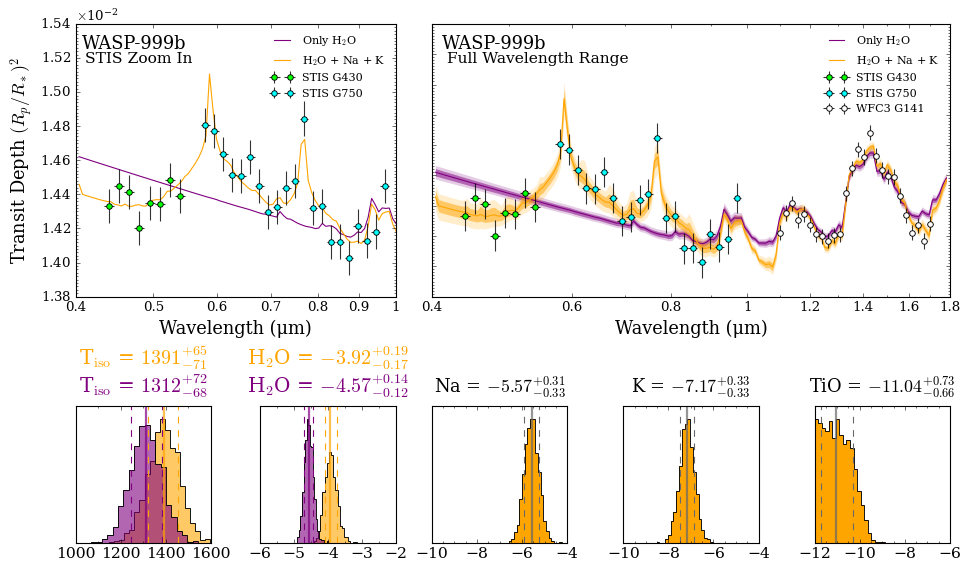

<Figure size 853.36x480 with 0 Axes>

<Figure size 853.36x480 with 0 Axes>

<Figure size 600x200 with 0 Axes>

<Figure size 600x200 with 0 Axes>

In [16]:
fig_combined = plt.figure(constrained_layout=True, figsize=(12, 7))  

# Create layout
axd = fig_combined.subplot_mosaic(
    """
    BBAAA
    BBAAA
    abcde
    """
)

# Define the model 1 and 2 colors for the plot 
model_1_color = 'purple'
model_2_color = 'orange'

# Create the spectra axes
ax_spectrum_1 = axd["B"]
ax_spectrum_2 = axd["A"]

# Plot the first spectrum panel
_ = plot_spectra_retrieved(spectra_median, spectra_low2, spectra_low1, 
                           spectra_high1, spectra_high2, planet_name,
                           data_stis, R_to_bin = 100, show_ymodel = False,
                           colour_list = [model_1_color, model_2_color], 
                           plt_label = 'STIS Zoom In',
                           spectra_labels = ['Only H$_2$O', 'H$_2$O + Na + K'],
                           data_labels = ['STIS G430', 'STIS G750'],
                           data_colour_list = ['lime', 'cyan'],
                           data_marker_list = ['o', 'o'], 
                           data_marker_size_list = [5, 5],
                           show_data_cap = False,
                           figure_shape = 'wide', save_fig = False,
                           y_min = 1.38e-2, y_max = 1.54e-2,
                           legend_location = 'upper right',
                           sigma_to_plot = 0,           # Remove 1 and 2 sigma contours
                           wl_min = 0.4, wl_max = 1.0,  # Restrict wavelength range
                           ax = ax_spectrum_1,  # <---------- Feed spectrum axis here
                           )

# Plot the second spectrum panel
_ = plot_spectra_retrieved(spectra_median, spectra_low2, spectra_low1, 
                           spectra_high1, spectra_high2, planet_name,
                           data, R_to_bin = 100, show_ymodel = False,
                           colour_list = [model_1_color, model_2_color], 
                           plt_label = 'Full Wavelength Range',
                           spectra_labels = ['Only H$_2$O', 'H$_2$O + Na + K'],
                           data_labels = ['STIS G430', 'STIS G750', 'WFC3 G141'],
                           data_colour_list = ['lime', 'cyan', 'white'],
                           data_marker_list = ['o', 'o', 'o'], 
                           data_marker_size_list = [5, 5, 5],
                           show_data_cap = False,
                           figure_shape = 'wide', save_fig = False,
                           y_min = 1.38e-2, y_max = 1.56e-2,
                           legend_location = 'upper right',
                           sigma_to_plot = 2,           # Show 1 and 2 sigma contours
                           ylabels = False,             # Disable y axis labels
                           ax = ax_spectrum_2,  # <---------- Feed spectrum axis here
                           )

# Grab histogram axes
axes_histograms_1 = [axd['a'], axd['b']]
axes_histograms_2 = [axd['c'], axd['d'], axd['e']]

# Plot first two panels
_ = plot_histograms(planet, models = [model_2, model_1], 
                    plot_parameters = ['T', 'log_H2O'], 
                    span = ((1000, 1600), (-6, -2)),
                    N_bins = [20, 20],
                    retrieval_colour_list = [model_2_color, model_1_color],
                    save_fig = False,
                    axes = axes_histograms_1, # <------ Feed first histogram axis here
                    tick_labelsize = 14,                                # x axis tick labels
                    title_fontsize = 18,                                # Title size
                    custom_labels = ['T$_{\mathrm{iso}}$', 'H$_2$O'],   # Custom titles
                    custom_ticks = [[200,100], [1,0.5]],                # Custom [major,minor] spacing
                    alpha_hist = 0.6,                                   # Histogram alpha
                    ) 

# Plot next three panels
_ = plot_histograms(planet, models = [model_2], 
                    plot_parameters = ['log_Na', 'log_K', 'log_TiO'], 
                    span = ((-10, -4), (-10, -4), (-12, -6)),
                    N_bins = [20, 20, 20],
                    parameter_colour_list = [model_2_color, model_2_color, model_2_color],
                    save_fig = False,
                    axes = axes_histograms_2,   # <------ Feed second histogram axis here
                    tick_labelsize = 14,                          # x axis tick labels
                    title_fontsize = 16,                          # Title size
                    custom_labels = ['Na', 'K', 'TiO'],           # Custom titles
                    custom_ticks = [[2,0.5], [2,0.5], [2,0.5],],  # Custom [major,minor] spacing
                    alpha_hist = 1.0                              # Histogram alpha
                    )

# Save plot as a PDF
fig_combined.savefig('./POSEIDON_output/WASP-999b/plots/Fancy_Plot.pdf', bbox_inches='tight')

### Metallicity and Mean Molecular Weight Histograms

Occasionally, we will want to plot our retrieved elemental ratios compared to the composition of the Sun (solar values). Solar abundances represent the abundance of each gas in the Sun's photosphere.

We will now plot the water volume mixing ratio and O/H (a proxy for metallicity taken from the water abundance), the sodium volume mixing ratio and Na/H (our sodium abundance compared to solar), and our retrieved atmosphere's mean molecular weight (μ).

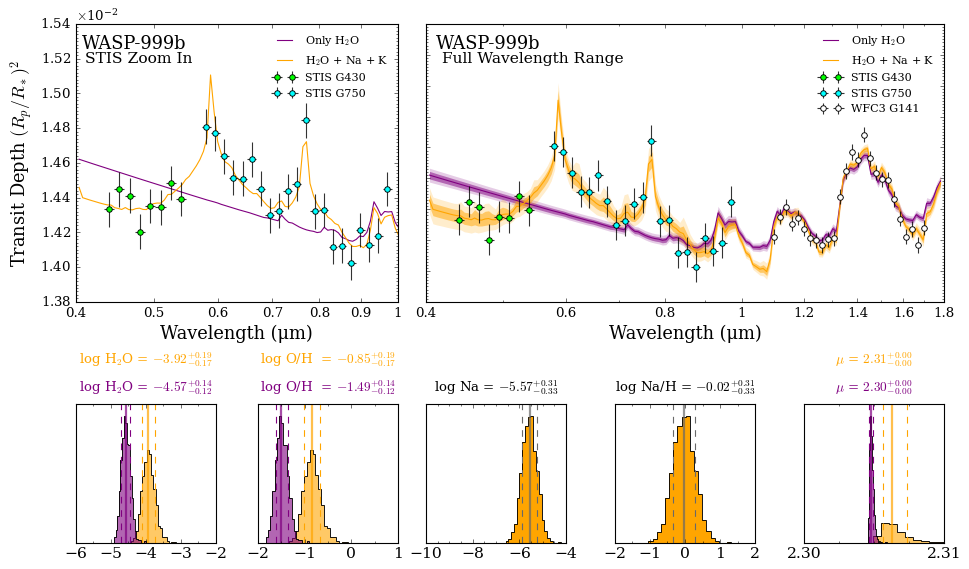

<Figure size 853.36x480 with 0 Axes>

<Figure size 853.36x480 with 0 Axes>

<Figure size 600x200 with 0 Axes>

<Figure size 600x200 with 0 Axes>

<Figure size 600x200 with 0 Axes>

In [17]:
fig_combined = plt.figure(constrained_layout=True, figsize=(12, 7))  

# Create layout
axd = fig_combined.subplot_mosaic(
    """
    BBAAA
    BBAAA
    abcde
    """
)

# Define the model 1 and 2 colors for the plot 
model_1_color = 'purple'
model_2_color = 'orange'

# Create the spectra axes
ax_spectrum_1 = axd["B"]
ax_spectrum_2 = axd["A"]

# Plot the first spectrum panel
_ = plot_spectra_retrieved(spectra_median, spectra_low2, spectra_low1, 
                           spectra_high1, spectra_high2, planet_name,
                           data_stis, R_to_bin = 100, show_ymodel = False,
                           colour_list = [model_1_color, model_2_color], 
                           plt_label = 'STIS Zoom In',
                           spectra_labels = ['Only H$_2$O', 'H$_2$O + Na + K'],
                           data_labels = ['STIS G430', 'STIS G750'],
                           data_colour_list = ['lime', 'cyan'],
                           data_marker_list = ['o', 'o'], 
                           data_marker_size_list = [5, 5],
                           show_data_cap = False,
                           figure_shape = 'wide', save_fig = False,
                           y_min = 1.38e-2, y_max = 1.54e-2,
                           legend_location = 'upper right',
                           sigma_to_plot = 0,           # Remove 1 and 2 sigma contours
                           wl_min = 0.4, wl_max = 1.0,  # Restrict wavelength range
                           ax = ax_spectrum_1,  # <---------- Feed spectrum axis here
                           )

# Plot the second spectrum panel
_ = plot_spectra_retrieved(spectra_median, spectra_low2, spectra_low1, 
                           spectra_high1, spectra_high2, planet_name,
                           data, R_to_bin = 100, show_ymodel = False,
                           colour_list = [model_1_color, model_2_color], 
                           plt_label = 'Full Wavelength Range',
                           spectra_labels = ['Only H$_2$O', 'H$_2$O + Na + K'],
                           data_labels = ['STIS G430', 'STIS G750', 'WFC3 G141'],
                           data_colour_list = ['lime', 'cyan', 'white'],
                           data_marker_list = ['o', 'o', 'o'], 
                           data_marker_size_list = [5, 5, 5],
                           show_data_cap = False,
                           figure_shape = 'wide', save_fig = False,
                           y_min = 1.38e-2, y_max = 1.56e-2,
                           legend_location = 'upper right',
                           sigma_to_plot = 2,           # Show 1 and 2 sigma contours
                           ylabels = False,             # Disable y axis labels
                           ax = ax_spectrum_2,  # <---------- Feed spectrum axis here
                           )

# Grab histogram axes
axes_histograms_1 = [axd['a'], axd['b']]
axes_histograms_2 = [axd['c'], axd['d']]
axes_histograms_3 = [axd['e']]

# Plot water and O/H ratio
_ = plot_histograms(planet, models = [model_2, model_1], 
                    plot_parameters = ['log_H2O', 'log_O/H'], 
                    span = ((-6, -2), (-2, 1)),
                    N_bins = [20, 20],
                    retrieval_colour_list = [model_2_color, model_1_color],
                    save_fig = False,
                    axes = axes_histograms_1, # <------ Feed first histogram axis here
                    tick_labelsize = 14,                                # x axis tick labels
                    title_fontsize = 12,                                # Title size
                    custom_labels = ['log H$_2$O', 'log O/H '],         # Custom titles
                    custom_ticks = [[1,0.5], [1,0.5]],                  # Custom [major,minor] spacing
                    alpha_hist = 0.6,                                   # Histogram alpha
                    ) 

# Plot sodium and Na/H ratio
_ = plot_histograms(planet, models = [model_2], 
                    plot_parameters = ['log_Na', 'log_Na/H'], 
                    span = ((-10, -4), (-2,2)),
                    N_bins = [20, 20],
                    parameter_colour_list = [model_2_color, model_2_color],
                    save_fig = False,
                    axes = axes_histograms_2,   # <------ Feed second histogram axis here
                    tick_labelsize = 14,                          # x axis tick labels
                    title_fontsize = 12,                          # Title size
                    custom_labels = ['log Na', 'log Na/H'],       # Custom titles
                    custom_ticks = [[2,0.5], [1,0.5]],            # Custom [major,minor] spacing
                    alpha_hist = 1.0                              # Histogram alpha
                    )


# Plot mu, the mean molecular weight 
_ = plot_histograms(planet, models = [model_2, model_1], 
                    plot_parameters = ['mu'], 
                    span = ((2.3,2.31),),
                    N_bins = [20, 20],
                    retrieval_colour_list = [model_2_color, model_1_color],
                    save_fig = False,
                    axes = axes_histograms_3, # <------ Feed third histogram axis here
                    tick_labelsize = 14,             # x axis tick labels
                    title_fontsize = 12,             # Title size
                    custom_labels = ['$\mu$'],       # Custom titles
                    custom_ticks = [[0.01,0.0025]],     # Custom [major,minor] spacing
                    alpha_hist = 0.6,                # Histogram alpha
                    ) 

Amazing! Now you too can go forth and create your own beautiful plots.

There are many optional plotting settings in POSEIDON, of which we have only demonstrated a few here. Feel free to experiment by looking inside the plotting functions!

## Multi-Retrieval Corner Plots

We can straightforwardly overplot the results from multiple retrievals that share a common subset of parameters. Let's overplot the posterior distributions for the two models above for their 3 common parameters (planet radius, temperature, and $\rm{H_2 O}$ abundance).

Generating corner plot 1...
Generating corner plot 2...


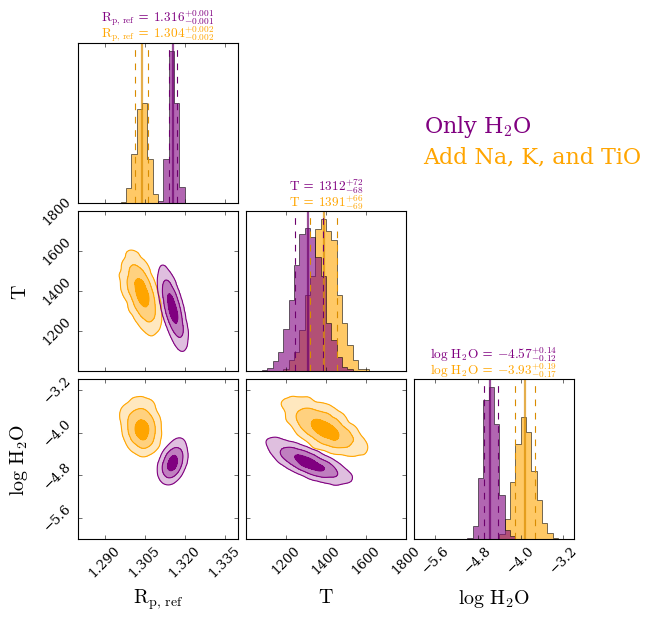

In [18]:
from POSEIDON.corner import generate_overplot

models = [model_2, model_1]

fig_overplot = generate_overplot(planet, models, 
                                 params_to_plot = ['R_p_ref', 'T', 'log_H2O'],
                                 span = [(1.28, 1.34), (1000, 1800), (-6, -3)],
                                 colour_schemes = ['orange', 'purple'],
                                 model_display_names = ['Add Na, K, and TiO', 'Only H$_2$O'],
                                )

It looks like our retrieved water abundances are slightly sub solar (meaning our metallicity is most likely sub solar as well), our retrieved sodium abundance is consistent with solar, and our mean molecular weight is tightly constrained at 2.31 (this is going to be tightly constrained for any gas giant and typically only varies for sub-Neptunes and lower mass objects).

A common quantity of interest to also plot is the C/O ratio. While this is not applicable here (as we have no carbon bearing species in the model), it is an option in plot_histograms ('C/O' or 'log_C/O').

Another option is to see the 'combined' metallicity ('log_M/H'), which sums the C, O, N, S, and P abundances compared to H. 

## LaTeX Tables for Papers

Often, we also want to summarise our retrieval results in a Table in a paper. LaTeX tables can be a bit of a pain to format, so POSEIDON includes a function to collect the retrieval results (median and +/- 1σ confidence intervals) and output nicely formatted LaTeX code that you can paste into a Table.

In [19]:
from POSEIDON.utility import make_latex_table_from_results

model_names = [model_name_1, model_name_2]
params = ['T','log_H2O', 'log_Na', 'log_K', 'log_TiO']

make_latex_table_from_results(model_names, params, planet_name)

T & $1312^{+72}_{-68}$ & $1391^{+66}_{-70}$ \\ 
log_H2O & $-4.57^{+0.14}_{-0.12}$ & $-3.93^{+0.19}_{-0.17}$ \\
log_Na &  --- &$-5.58^{+0.31}_{-0.32}$ \\
log_K &  --- &$-7.18^{+0.33}_{-0.33}$ \\
log_TiO &  --- &$-11.03^{+0.73}_{-0.66}$ \\


## Retrieval Solution Forward Model Exploration

We might want to create a forward model from our retrieved results in order to visualise how and why a retrieval settled on a certain solution, or to see how the spectrum might look extrapolated to longer wavelengths. 

POSEIDON has a function to pull the median and best-fitting forward model from a retrieval for just such applications.

Let's pull the best-fitting forward model from our model 2 from above so we can see what the retrieved spectrum looks like up to 15 μm.

In [20]:
from POSEIDON.core import wl_grid_constant_R

#***** Model wavelength grid *****#

wl_min = 0.4     # Minimum wavelength (um)
wl_max = 15      # Maximum wavelength (um)
R = 4000         # Spectral resolution of grid      

# We need to provide a model wavelength grid to initialise instrument properties
wl = wl_grid_constant_R(wl_min, wl_max, R)

Load the opacity object so that the forward models can be generated and plotted

In [21]:
from POSEIDON.core import read_opacities
import numpy as np

#***** Specify fixed atmospheric settings from retrieval *****#

# Atmospheric pressure grid
P_min = 1.0e-7    # 0.1 ubar
P_max = 100       # 100 bar
N_layers = 100    # 100 layers

# Let's space the layers uniformly in log-pressure
P = np.logspace(np.log10(P_max), np.log10(P_min), N_layers)

# Specify the reference pressure
P_ref = 10.0   # Retrieved R_p_ref parameter will be the radius at 10 bar

#***** Read opacity data *****#

opacity_treatment = 'opacity_sampling'

# Define fine temperature grid (K)
T_fine_min = 400     # Same as prior range for T
T_fine_max = 1600    # Same as prior range for T
T_fine_step = 10     # 10 K steps are a good tradeoff between accuracy and RAM

T_fine = np.arange(T_fine_min, (T_fine_max + T_fine_step), T_fine_step)

# Define fine pressure grid (log10(P/bar))
log_P_fine_min = -6.0   # 1 ubar is the lowest pressure in the opacity database
log_P_fine_max = 2.0    # 100 bar is the highest pressure in the opacity database
log_P_fine_step = 0.2   # 0.2 dex steps are a good tradeoff between accuracy and RAM

log_P_fine = np.arange(log_P_fine_min, (log_P_fine_max + log_P_fine_step), 
                       log_P_fine_step)

# Pre-interpolate the opacities
opac = read_opacities(model_2, wl, opacity_treatment, T_fine, log_P_fine)

Reading in cross sections in opacity sampling mode...
H2-H2 done
H2-He done
Na done
K done
TiO done
H2O done
Opacity pre-interpolation complete.


The function `get_retrieved_atmosphere` will automatically generate the atmosphere object for the best-fitting set of retrieved parameters.

In [22]:
from POSEIDON.retrieval import get_retrieved_atmosphere

atmosphere_median = get_retrieved_atmosphere(planet, model_2, P, P_ref_set = P_ref)

Let's generate and plot the spectrum corresponding to the best-fitting atmosphere.

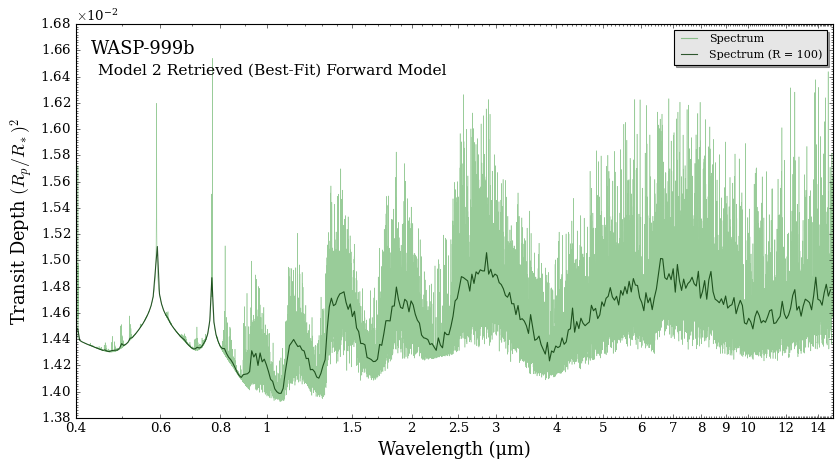

In [23]:
from POSEIDON.core import compute_spectrum
from POSEIDON.visuals import plot_spectra
from POSEIDON.utility import plot_collection

# Generate spectrum
spectrum_median = compute_spectrum(planet, star, model_2, atmosphere_median, 
                                   opac, wl, spectrum_type = 'transmission')
# Plot spectrum
spectra = plot_collection(spectrum_median, wl, collection = [])

fig = plot_spectra(spectra, planet, R_to_bin = 100,
                   plt_label = 'Model 2 Retrieved (Best-Fit) Forward Model',
                   save_fig = False,
                   figure_shape = 'wide',
                   ) 

We can now predict what the spectrum might look like if we observe this planet in longer infrared wavelengths. From our retrieved results alone, it looks like longer wavelengths will be dominated by water absorption bands.

The function `get_retrieved_atmosphere` will pull the best-fitting (maximum likelihood) retrieved atmosphere by default. But we can also pull the median retrieved atmosphere.

We can also have the function print out the parameters used to generate the atmosphere object using the `verbose` argument:

In [24]:
print('Best-Fit atmosphere parameters')
atmosphere_bestfit = get_retrieved_atmosphere(planet, model_2, P, P_ref_set = P_ref, 
                                              median = False, best_fit = True, 
                                              verbose = True,
                                             )

print()

print('Median atmosphere parameters')
atmosphere_median = get_retrieved_atmosphere(planet, model_2, P, P_ref_set = P_ref, 
                                             median = True, best_fit = False, 
                                             verbose = True,
                                            )

Best-Fit atmosphere parameters
R_p_ref =  1.3039539769781165 *  R_J
PT_params = np.array( [1378.9488794972872] )
log_X_params = np.array( [-5.483149145322625, -7.099385703384315, -11.293548481549795, -3.892754112412364] )
cloud_params = np.array( [] )
geometry_params = np.array( [] )

Median atmosphere parameters
R_p_ref =  1.3039356287362254 *  R_J
PT_params = np.array( [1390.8399768615102] )
log_X_params = np.array( [-5.576575090879877, -7.1822747395536375, -11.034657429126623, -3.925671169652905] )
cloud_params = np.array( [] )
geometry_params = np.array( [] )


Let's plot both the median and best fit spectra to see how they differ

In [25]:
from POSEIDON.core import compute_spectrum
from POSEIDON.visuals import plot_spectra
from POSEIDON.utility import plot_collection

# Generate spectrum
spectrum_median = compute_spectrum(planet, star, model_2, atmosphere_median, opac, wl,
                                   spectrum_type = 'transmission')

spectrum_bestfit = compute_spectrum(planet, star, model_2, atmosphere_bestfit, opac, wl,
                                    spectrum_type = 'transmission')


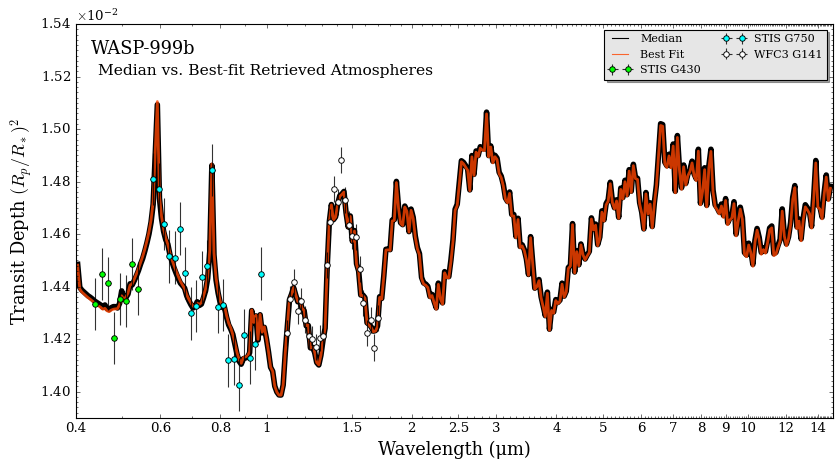

In [26]:
# Plot spectrum
spectra = []
spectra = plot_collection(spectrum_median, wl, collection = spectra)
spectra = plot_collection(spectrum_bestfit, wl, collection = spectra)

fig = plot_spectra(spectra, planet, data_properties = data, R_to_bin = 100, 
                   plot_full_res = False, show_data = True,
                   plt_label = 'Median vs. Best-fit Retrieved Atmospheres',
                   spectra_labels = ['Median', 'Best Fit'],
                   data_colour_list = ['lime', 'cyan', 'white'],
                   data_marker_list = ['o','o','o'],
                   data_marker_size_list = [5,5,5],
                   show_data_cap = False,
                   data_labels = ['STIS G430', 'STIS G750', 'WFC3 G141'],
                   line_widths = [5,2.5], 
                   line_styles = ['-', '-'],
                   alphas = [1, 0.8],
                   colour_list = ['black', 'orangered'],
                   legend_n_columns = 2,
                   save_fig = False,
                   figure_shape = 'wide',
                   y_min = 1.39e-2, y_max = 1.54e-2,
                   ) 

As you can see, the median and best-fitting atmospheres are usually rather similar.

Did you notice that we used some more optional arguments in the `plot_spectra` function to customise our plot?

We used different `line_widths` so that the median spectra (which is plotted first) will still show up when the best-fit spectra is plotted on top of it. We also used different alpha values also define the alpha of each line. Here we have the best-fitting spectrum, which is plotted second, with an alpha of 0.8 so that it is slightly transparent on top of the median spectra.

In our retrieval, we did not detect TiO (see the upper limits on the $\rm{TiO} mixing ratios in the histograms above). In order to explore why, let's print out the median retrieved atmosphere and generate a new atmosphere object with a higher volume mixing ratio of TiO.  

In [27]:
print('Median atmosphere')
atmosphere_median = get_retrieved_atmosphere(planet, model_2, P, P_ref_set = P_ref,
                                             median = True, best_fit = False,
                                             verbose = True,
                                             )
print()
print("Free parameters for model 2: " + str(model_2['param_names']))

Median atmosphere
R_p_ref =  1.3039356287362254 *  R_J
PT_params = np.array( [1390.8399768615102] )
log_X_params = np.array( [-5.576575090879877, -7.1822747395536375, -11.034657429126623, -3.925671169652905] )
cloud_params = np.array( [] )
geometry_params = np.array( [] )

Free parameters for model 2: ['R_p_ref' 'T' 'log_Na' 'log_K' 'log_TiO' 'log_H2O']


So we see that the median atmosphere has a very low $\rm{TiO}$ abundance of $\log_{10} \rm{TiO} = -10.96$.

Below we define an atmosphere using the printed out statements above. The order of parameters is the same as the order the model was defined with. 

In our case, TiO is the third volume mixing ratio in log_X_params. Let's change it from -11 to a higher abundance of -7

In [28]:
from POSEIDON.core import make_atmosphere

# Reference radius
R_p_ref =  1.3039737 * R_J

# Temperature
PT_params = np.array([1401.392])

# Set TiO to a higher abundance 
log_X_params_more_TiO = np.array( [-5.60, -7.19, -7, -3.90])

atmosphere_high_TiO = make_atmosphere(planet, model_2, P, P_ref, 
                                      R_p_ref, PT_params, 
                                      log_X_params_more_TiO,
                                      )

Now that we have the median retrieved atmosphere object and the median retrieved atmosphere object with more TiO, let's compute the spectra and plot them together.

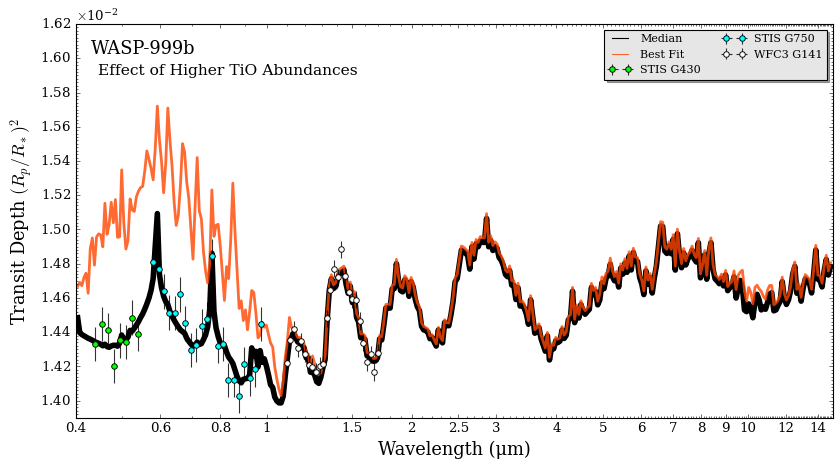

In [29]:
from POSEIDON.core import compute_spectrum
from POSEIDON.visuals import plot_spectra
from POSEIDON.utility import plot_collection

# Generate spectrum
spectrum_median = compute_spectrum(planet, star, model_2, atmosphere_median, opac, wl,
                                      spectrum_type = 'transmission')

spectrum_high_TiO = compute_spectrum(planet, star, model_2, atmosphere_high_TiO, opac, wl,
                                      spectrum_type = 'transmission')
# Plot spectrum
spectra = []
spectra = plot_collection(spectrum_median, wl, collection = spectra)
spectra = plot_collection(spectrum_high_TiO, wl, collection = spectra)

fig = plot_spectra(spectra, planet, data_properties = data, R_to_bin = 100, 
                   plot_full_res = False, show_data = True,
                   plt_label = 'Effect of Higher TiO Abundances',
                   spectra_labels = ['Median', 'Best Fit'],
                   data_colour_list = ['lime', 'cyan', 'white'],
                   data_marker_list = ['o','o','o'],
                   data_marker_size_list = [5,5,5],
                   show_data_cap = False,
                   data_labels = ['STIS G430', 'STIS G750', 'WFC3 G141'],
                   line_widths = [5,2.5], 
                   line_styles = ['-', '-'],
                   alphas = [1, 0.8],
                   colour_list = ['black', 'orangered'],
                   legend_n_columns = 2,
                   save_fig = False,
                   figure_shape = 'wide',
                   y_min = 1.39e-2, y_max = 1.62e-2,
                   ) 

Aha! Now we can see why $\rm{TiO}$ was disfavoured in the retrieval. Since $\rm{TiO}$ has a strong cross section in the STIS wavelength range, this molecule doesn't match the observed spectrum at all and hence is not present in any appreciable abundance in WASP-999b's atmosphere.